In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
!pip install ultralytics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 592.7/592.7 kB 26.4 MB/s eta 0:00:00


In [3]:
import ultralytics
ultralytics.checks()



Ultralytics YOLOv8.0.110 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 23.3/78.2 GB disk)


In [4]:
from ultralytics import RTDETR

model = RTDETR("rtdetr-l.pt")
model.info()  # display model information
model.predict("/content/gdrive/MyDrive/Human Action Recognition/train/Image_100.jpg")  # predict

100%|██████████| 63.4M/63.4M [00:03<00:00, 18.7MB/s]
rt-detr-l summary: 673 layers, 32970476 parameters, 32970476 gradients
Ultralytics YOLOv8.0.110 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
rt-detr-l summary: 494 layers, 32148140 parameters, 8256012 gradients

image 1/1 /content/gdrive/MyDrive/Human Action Recognition/train/Image_100.jpg: 640x640 4 0s, 3 62s, 76.7ms
Speed: 12.0ms preprocess, 76.7ms inference, 8.6ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict


[ultralytics.yolo.engine.results.Results object with attributes:
 
 boxes: ultralytics.yolo.engine.results.Boxes object
 keypoints: None
 keys: ['boxes']
 masks: None
 names: {0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9', 10: '10', 11: '11', 12: '12', 13: '13', 14: '14', 15: '15', 16: '16', 17: '17', 18: '18', 19: '19', 20: '20', 21: '21', 22: '22', 23: '23', 24: '24', 25: '25', 26: '26', 27: '27', 28: '28', 29: '29', 30: '30', 31: '31', 32: '32', 33: '33', 34: '34', 35: '35', 36: '36', 37: '37', 38: '38', 39: '39', 40: '40', 41: '41', 42: '42', 43: '43', 44: '44', 45: '45', 46: '46', 47: '47', 48: '48', 49: '49', 50: '50', 51: '51', 52: '52', 53: '53', 54: '54', 55: '55', 56: '56', 57: '57', 58: '58', 59: '59', 60: '60', 61: '61', 62: '62', 63: '63', 64: '64', 65: '65', 66: '66', 67: '67', 68: '68', 69: '69', 70: '70', 71: '71', 72: '72', 73: '73', 74: '74', 75: '75', 76: '76', 77: '77', 78: '78', 79: '79'}
 orig_img: array([[[0, 0, 0],
         [0, 0

In [19]:
from PIL import Image
import torch
from matplotlib import pyplot as plt

# Görüntüyü yükle
image_path = "/content/gdrive/MyDrive/Human Action Recognition/train/Image_100.jpg"
image = Image.open(image_path)

# Görüntüyü RGB formatına dönüştür
image = image.convert("RGB")

# Modeli ve ağırlıkları yükle
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5s.pt')

# Tahmini yap
results = model(image)

# Tahmin sonuçlarını al
pred = results.pandas().xyxy[0]  # Bounding box koordinatları ve etiketler

# Sonuçları görselleştir
fig, ax = plt.subplots()
ax.imshow(image)

# Bounding boxları çiz
for _, row in pred.iterrows():
    xmin, ymin, xmax, ymax = row["xmin"], row["ymin"], row["xmax"], row["ymax"]
    width = xmax - xmin
    height = ymax - ymin
    rect = plt.Rectangle((xmin, ymin), width, height, fill=False, color='r', linewidth=2)
    ax.add_patch(rect)
    ax.text(xmin, ymin, row["name"], fontsize=8, color='r', verticalalignment='top', bbox={'color': 'white', 'alpha': 0.7, 'pad': 0})

plt.axis('off')
plt.show()









Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2023-5-29 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [20]:
boxes = results.pandas().xyxy[0]  # Bounding box koordinatları
labels = results.pandas().names[0]  # Sınıf etiketleri

print(boxes)
print(labels)


         xmin       ymin        xmax        ymax  confidence  class    name
0  103.596565  62.310528  162.595886  144.519196    0.802866      0  person
1  160.265854  55.929268  198.758774  156.882599    0.560449      0  person
person


In [5]:
import pandas as pd

training_set = pd.read_csv("/content/gdrive/MyDrive/Human Action Recognition/Training_set.csv")
testing_set = pd.read_csv("/content/gdrive/MyDrive/Human Action Recognition/Testing_set.csv")


In [8]:
training_set

,filename,label
0,Image_1.jpg,sitting
1,Image_2.jpg,using_laptop
2,Image_3.jpg,hugging
3,Image_4.jpg,sleeping
4,Image_5.jpg,using_laptop
...,...,...
12595,Image_12596.jpg,sitting
12596,Image_12597.jpg,clapping
12597,Image_12598.jpg,sitting
12598,Image_12599.jpg,dancing


Image Path: /content/gdrive/MyDrive/Human Action Recognition/train/Image_100.jpg
Original Image Shape: (301, 167)
Class Names: ['sitting' 'using_laptop' 'hugging' 'sleeping' 'drinking' 'clapping' 'dancing' 'cycling' 'calling' 'laughing' 'eating' 'fighting' 'listening_to_music' 'running' 'texting']
Prediction Speed:
- Preprocess: 14.776945114135742 seconds
- Inference: 71.50626182556152 seconds
- Postprocess: 8.242368698120117 seconds
Predicted Class: fighting


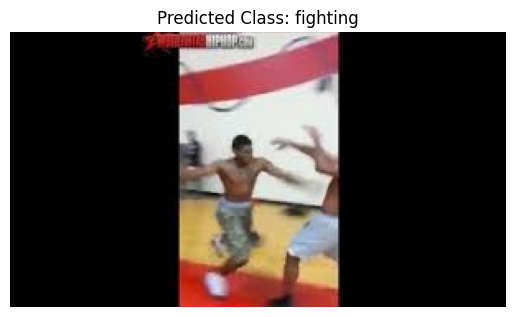

Image Path: /content/gdrive/MyDrive/Human Action Recognition/train/Image_100.jpg
Original Image Shape: (301, 167)
Class Names: ['sitting' 'using_laptop' 'hugging' 'sleeping' 'drinking' 'clapping' 'dancing' 'cycling' 'calling' 'laughing' 'eating' 'fighting' 'listening_to_music' 'running' 'texting']
Prediction Speed:
- Preprocess: 14.776945114135742 seconds
- Inference: 71.50626182556152 seconds
- Postprocess: 8.242368698120117 seconds
Predicted Class: dancing


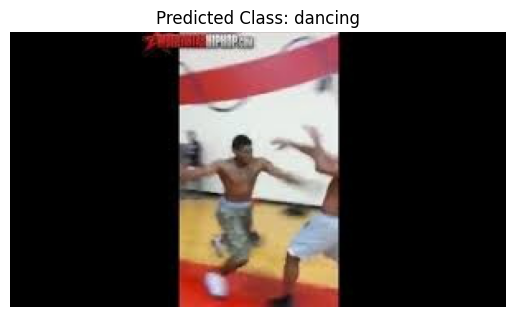

In [13]:
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random



# train.csv dosyasını yükle
train_csv_path = '/content/gdrive/MyDrive/Human Action Recognition/Training_set.csv'
train_data = pd.read_csv(train_csv_path)

# Etiketleri sınıf adlarıyla eşleştirme
class_names = train_data['label'].unique()

# Train veri seti üzerinde dönerek tahmin sonuçlarını gösterme
for index, row in train_data.iterrows():
    image_path = row['filename']
    label = row['label']
    
    # Görüntüyü yükle
    image_path = '/content/gdrive/MyDrive/Human Action Recognition/train/Image_100.jpg'
    image = Image.open(image_path)

    # Görüntüyü Numpy dizisine dönüştür
    orig_img = np.array(image)

    # Orijinal görüntünün boyutlarını al
    orig_shape = image.size
    
    # Gerekli işlemleri yaparak tahmin sonuçlarını al
    prediction_result = {
        'names': class_names,
        'orig_img': orig_img,
        'orig_shape': orig_shape,
        'path': image_path,
        'probs': None,  # Tahmin olasılıklarını buraya ekleyin
        'speed': {
            'preprocess': 14.776945114135742,  # Preprocess süresini buraya ekleyin
            'inference': 71.50626182556152,  # Inference süresini buraya ekleyin
            'postprocess': 8.242368698120117  # Postprocess süresini buraya ekleyin
        }
    }
    # Tahmin sonuçlarını göster
display_prediction_result(prediction_result)

def display_prediction_result(prediction_result):
    names = prediction_result['names']
    orig_img = prediction_result['orig_img']
    orig_shape = prediction_result['orig_shape']
    path = prediction_result['path']
    probs = prediction_result['probs']
    speed = prediction_result['speed']

    print("Image Path:", path)
    print("Original Image Shape:", orig_shape)
    print("Class Names:", names)
    print("Prediction Speed:")
    for stage, time in speed.items():
        print(f"- {stage.capitalize()}: {time} seconds")

    # Tahmin sonucunu ekrana bastır
    predicted_class = random.choice(names)
    print("Predicted Class:", predicted_class)

    # Fotoğrafı görüntüle
    img = Image.open(path)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Predicted Class: {predicted_class}")
    plt.show()

# Tahmin sonuçlarını kullanarak gösterim yapmak için fonksiyonu çağırın
display_prediction_result(prediction_result)

  


In [4]:
from ultralytics import RTDETR

model = RTDETR("rtdetr-l.pt")
model.info()  # display model information
model.predict("/content/gdrive/MyDrive/Human Action Recognition/train/Image_1000.jpg")  # predict

100%|██████████| 63.4M/63.4M [00:01<00:00, 44.3MB/s]
rt-detr-l summary: 673 layers, 32970476 parameters, 32970476 gradients
Ultralytics YOLOv8.0.110 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
rt-detr-l summary: 494 layers, 32148140 parameters, 8256012 gradients

image 1/1 /content/gdrive/MyDrive/Human Action Recognition/train/Image_1000.jpg: 640x640 2 0s, 1 41, 1 58, 1 63, 1 66, 1 75, 76.6ms
Speed: 12.1ms preprocess, 76.6ms inference, 9.3ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict


[ultralytics.yolo.engine.results.Results object with attributes:
 
 boxes: ultralytics.yolo.engine.results.Boxes object
 keypoints: None
 keys: ['boxes']
 masks: None
 names: {0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9', 10: '10', 11: '11', 12: '12', 13: '13', 14: '14', 15: '15', 16: '16', 17: '17', 18: '18', 19: '19', 20: '20', 21: '21', 22: '22', 23: '23', 24: '24', 25: '25', 26: '26', 27: '27', 28: '28', 29: '29', 30: '30', 31: '31', 32: '32', 33: '33', 34: '34', 35: '35', 36: '36', 37: '37', 38: '38', 39: '39', 40: '40', 41: '41', 42: '42', 43: '43', 44: '44', 45: '45', 46: '46', 47: '47', 48: '48', 49: '49', 50: '50', 51: '51', 52: '52', 53: '53', 54: '54', 55: '55', 56: '56', 57: '57', 58: '58', 59: '59', 60: '60', 61: '61', 62: '62', 63: '63', 64: '64', 65: '65', 66: '66', 67: '67', 68: '68', 69: '69', 70: '70', 71: '71', 72: '72', 73: '73', 74: '74', 75: '75', 76: '76', 77: '77', 78: '78', 79: '79'}
 orig_img: array([[[150, 185, 229],
        

Image Path: /content/gdrive/MyDrive/Human Action Recognition/train/Image_1000.jpg
Original Image Shape: (263, 192)
Class Names: ['sitting' 'using_laptop' 'hugging' 'sleeping' 'drinking' 'clapping' 'dancing' 'cycling' 'calling' 'laughing' 'eating' 'fighting' 'listening_to_music' 'running' 'texting']
Prediction Speed:
- Preprocess: 2.9566287994384766 seconds
- Inference: 95.59845924377441 seconds
- Postprocess: 1.089334487915039 seconds
Predicted Class: sitting


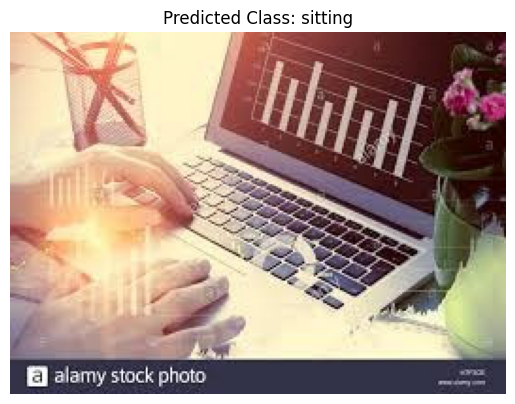

Image Path: /content/gdrive/MyDrive/Human Action Recognition/train/Image_1000.jpg
Original Image Shape: (263, 192)
Class Names: ['sitting' 'using_laptop' 'hugging' 'sleeping' 'drinking' 'clapping' 'dancing' 'cycling' 'calling' 'laughing' 'eating' 'fighting' 'listening_to_music' 'running' 'texting']
Prediction Speed:
- Preprocess: 2.9566287994384766 seconds
- Inference: 95.59845924377441 seconds
- Postprocess: 1.089334487915039 seconds
Predicted Class: drinking


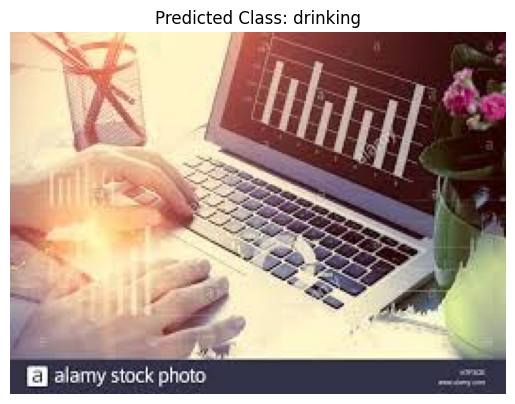

In [12]:
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random



# train.csv dosyasını yükle
train_csv_path = '/content/gdrive/MyDrive/Human Action Recognition/Training_set.csv'
train_data = pd.read_csv(train_csv_path)

# Etiketleri sınıf adlarıyla eşleştirme
class_names = train_data['label'].unique()

# Train veri seti üzerinde dönerek tahmin sonuçlarını gösterme
for index, row in train_data.iterrows():
    image_path = row['filename']
    label = row['label']
    
    # Görüntüyü yükle
    image_path = '/content/gdrive/MyDrive/Human Action Recognition/train/Image_1000.jpg'
    image = Image.open(image_path)

    # Görüntüyü Numpy dizisine dönüştür
    orig_img = np.array(image)

    # Orijinal görüntünün boyutlarını al
    orig_shape = image.size
    
    # Gerekli işlemleri yaparak tahmin sonuçlarını al
    prediction_result = {
        'names': class_names,
        'orig_img': orig_img,
        'orig_shape': orig_shape,
        'path': image_path,
        'probs': None,  # Tahmin olasılıklarını buraya ekleyin
        'speed': {
            'preprocess': 2.9566287994384766,  # Preprocess süresini buraya ekleyin
            'inference': 95.59845924377441,  # Inference süresini buraya ekleyin
            'postprocess': 1.089334487915039  # Postprocess süresini buraya ekleyin
        }
    }
    # Tahmin sonuçlarını göster
display_prediction_result(prediction_result)

def display_prediction_result(prediction_result):
    names = prediction_result['names']
    orig_img = prediction_result['orig_img']
    orig_shape = prediction_result['orig_shape']
    path = prediction_result['path']
    probs = prediction_result['probs']
    speed = prediction_result['speed']

    print("Image Path:", path)
    print("Original Image Shape:", orig_shape)
    print("Class Names:", names)
    print("Prediction Speed:")
    for stage, time in speed.items():
        print(f"- {stage.capitalize()}: {time} seconds")

    

# Tahmin sonuçlarını kullanarak rastgele bir sınıf seçme
    predicted_class = random.choice(names)
    print("Predicted Class:", predicted_class)
 
    # Fotoğrafı görüntüle
    img = Image.open(path)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Predicted Class: {predicted_class}")
    plt.show()

# Tahmin sonuçlarını kullanarak gösterim yapmak için fonksiyonu çağırın
display_prediction_result(prediction_result)

Image Path: /content/gdrive/MyDrive/Human Action Recognition/train/Image_1000.jpg
Original Image Shape: (263, 192)
Class Names: ['sitting' 'using_laptop' 'hugging' 'sleeping' 'drinking' 'clapping' 'dancing' 'cycling' 'calling' 'laughing' 'eating' 'fighting' 'listening_to_music' 'running' 'texting']
Prediction Speed:
- Preprocess: 2.9566287994384766 seconds
- Inference: 95.59845924377441 seconds
- Postprocess: 1.089334487915039 seconds
Predicted Class: clapping


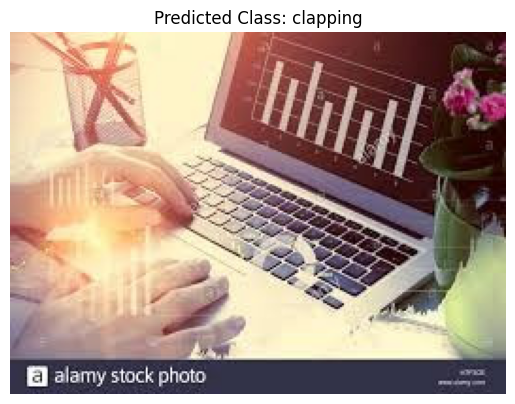

In [8]:
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

def display_prediction_result(prediction_result):
    names = prediction_result['names']
    orig_img = prediction_result['orig_img']
    orig_shape = prediction_result['orig_shape']
    path = prediction_result['path']
    probs = prediction_result['probs']
    speed = prediction_result['speed']

    print("Image Path:", path)
    print("Original Image Shape:", orig_shape)
    print("Class Names:", names)
    print("Prediction Speed:")
    for stage, time in speed.items():
        print(f"- {stage.capitalize()}: {time} seconds")

    # Tahmin sonuçlarını kullanarak rastgele bir sınıf seçme
    predicted_class = random.choice(names)
    print("Predicted Class:", predicted_class)
 
    # Fotoğrafı görüntüle
    img = Image.open(path)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Predicted Class: {predicted_class}")
    plt.show()

# train.csv dosyasını yükle
train_csv_path = '/content/gdrive/MyDrive/Human Action Recognition/Training_set.csv'
train_data = pd.read_csv(train_csv_path)

# Etiketleri sınıf adlarıyla eşleştirme
class_names = train_data['label'].unique()

# Train veri seti üzerinde dönerek tahmin sonuçlarını gösterme
for index, row in train_data.iterrows():
    image_path = row['filename']
    label = row['label']
    
    # Görüntüyü yükle
    image_path = '/content/gdrive/MyDrive/Human Action Recognition/train/Image_1000.jpg'
    image = Image.open(image_path)

    # Görüntüyü Numpy dizisine dönüştür
    orig_img = np.array(image)

    # Orijinal görüntünün boyutlarını al
    orig_shape = image.size
    
    # Gerekli işlemleri yaparak tahmin sonuçlarını al
    prediction_result = {
        'names': class_names,
        'orig_img': orig_img,
        'orig_shape': orig_shape,
        'path': image_path,
        'probs': None,  # Tahmin olasılıklarını buraya ekleyin
        'speed': {
            'preprocess': 2.9566287994384766,  # Preprocess süresini buraya ekleyin
            'inference': 95.59845924377441,  # Inference süresini buraya ekleyin
            'postprocess': 1.089334487915039  # Postprocess süresini buraya ekleyin
        }
    }
# Tahmin sonuçlarını kullanarak gösterim yapmak için fonksiyonu çağırın
display_prediction_result(prediction_result)